## 과제.
타이타닉 생존자 예측모델 개발을 위한 전처리 및 통계적 시각적 탐색을 통하여 최적의 분석용 데이터셋을 작성하세요.

#### Titanic data 전처리
- 분석 데이터 : titanic3.csv
- 재사용 가능한 전처리 사용자 함수 작성 하여 전처리
    - Null 값 처리 : Age는 평균나이, 나머지 칼럼은 'N'값으로 변경
    - 불필요한 속성 칼럼 삭제
    - 문자열 칼럼 레이블 인코딩
- 통계적, 시각적 탐색을 통한 다양한 인사이트 도출
- 탐색적 분석을 통한 feature engineering, 파생변수 

#### 컬럼 정보

- survived : 생존여부(1: 생존, 0 : 사망)
- pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 동반한 형제자매, 배우자 수
- parch : 동반한 부모, 자식 수
- ticket : 티켓의 고유 넘버
- fare 티켓의 요금
- cabin : 객실 번호
- embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
- boat
- body
- home.dest

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataSet/titanic3.csv")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [3]:
df.age.value_counts(dropna = False)

NaN      263
24.00     47
22.00     43
21.00     41
30.00     40
        ... 
66.00      1
0.67       1
76.00      1
67.00      1
26.50      1
Name: age, Length: 99, dtype: int64

In [4]:
df.boat.value_counts(dropna = False)

NaN        823
13          39
C           38
15          37
14          33
4           31
10          29
5           27
3           26
9           25
11          25
16          23
8           23
7           23
D           20
6           20
12          19
2           13
A           11
B            9
1            5
5 7          2
C D          2
13 15        2
5 9          1
8 10         1
13 15 B      1
15 16        1
Name: boat, dtype: int64

In [5]:
df.body.value_counts(dropna = False)

NaN      1188
58.0        1
285.0       1
156.0       1
143.0       1
         ... 
174.0       1
169.0       1
245.0       1
46.0        1
304.0       1
Name: body, Length: 122, dtype: int64

In [6]:
df.cabin.value_counts(dropna = False)

NaN                1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
C22 C26               4
                   ... 
E63                   1
B102                  1
B39                   1
D40                   1
F38                   1
Name: cabin, Length: 187, dtype: int64

In [7]:
df[(df["survived"] == 1) & (df["boat"] != np.nan)]["boat"].value_counts()

13         39
15         37
C          37
14         32
4          31
10         29
5          27
3          26
9          25
11         25
16         23
8          23
7          23
6          20
D          19
12         18
2          13
B           8
A           7
1           5
5 7         2
C D         2
13 15       2
8 10        1
5 9         1
13 15 B     1
15 16       1
Name: boat, dtype: int64

In [8]:
df[(df["survived"] == 0) & (df["boat"] != np.nan)]["boat"].value_counts()

A     4
14    1
12    1
D     1
B     1
C     1
Name: boat, dtype: int64

In [9]:
df[(df["survived"] == 0) & (df["body"] != np.nan)]["body"].value_counts()

135.0    1
101.0    1
37.0     1
285.0    1
156.0    1
        ..
97.0     1
174.0    1
169.0    1
245.0    1
304.0    1
Name: body, Length: 121, dtype: int64

In [10]:
df[(df["survived"] == 1) & (df["body"] != np.nan)]["body"].value_counts()

Series([], Name: body, dtype: int64)

In [11]:
df[(df["survived"] == 1) & (df["boat"].isna())]["survived"].value_counts()

1    23
Name: survived, dtype: int64

In [12]:
df[(df["survived"] == 0) & (df["boat"].isna())]["survived"].value_counts()

0    800
Name: survived, dtype: int64

In [13]:
import re

# 정규표현식 패턴
pattern = r',\s*([\w\s]+)\.'

# Name 컬럼(column)에서 호칭(prefix)을 추출하여 새로운 컬럼(column) Title에 저장
df['Title'] = df['name'].str.extract(pattern)[0]

# 결과 확인
print(df['Title'].value_counts())


Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: Title, dtype: int64


In [14]:
def get_ct(parch):
    cat = ""
    if parch != 0: cat = "o"
    else: cat = "x"
    return cat
        
df["parch_cat"] = df["parch"].apply(lambda x : get_ct(x))

In [15]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title,parch_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,x
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,o
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,o
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,o
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Miss,x
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Miss,x
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Mr,x
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Mr,x


<AxesSubplot:xlabel='fare', ylabel='Count'>

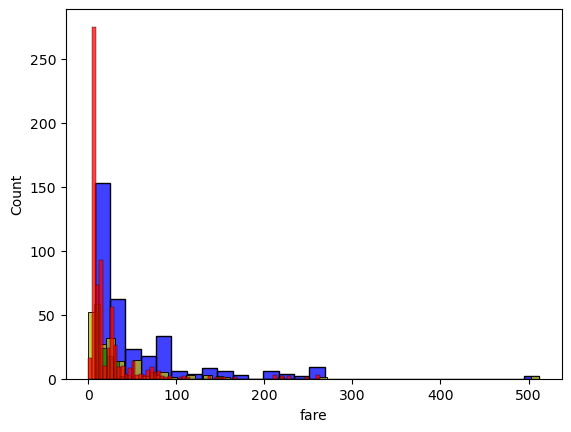

In [16]:
a = df[(df.survived == 1) & (df.sex == "female")]["fare"]
b = df[(df.survived == 1) & (df.sex == "male")]["fare"]
c = df[(df.survived == 0) & (df.sex == "female")]["fare"]
d = df[(df.survived == 0) & (df.sex == "male")]["fare"]

sns.histplot(a, color = "b")
sns.histplot(b, color = "y")
sns.histplot(c, color = "green")
sns.histplot(d, color = "r")


<AxesSubplot:xlabel='pclass', ylabel='Count'>

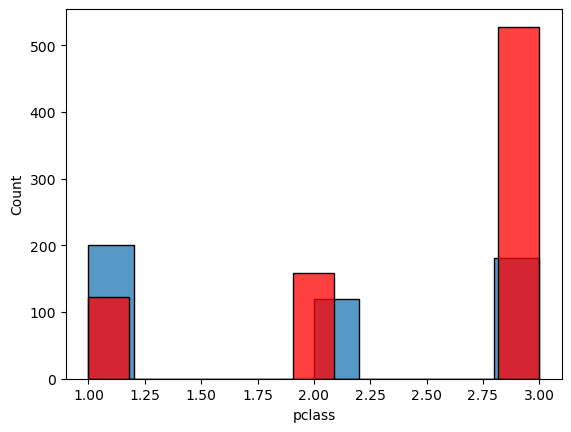

In [17]:
a = df[df.survived == 1]["pclass"]
b = df[df.survived == 0]["pclass"]

sns.histplot(a)
sns.histplot(b, color = "r")

In [18]:
df[["fare","pclass"]].corr()

,fare,pclass
fare,1.000000,-0.558629
pclass,-0.558629,1.000000


In [19]:
a = df[["Title","survived","parch_cat"]].groupby(["Title","parch_cat"])
a.mean()

survived
Title        parch_cat          
Capt         o          0.000000
Col          x          0.500000
Don          x          0.000000
Dona         x          1.000000
Dr           o          1.000000
             x          0.428571
Jonkheer     x          0.000000
Lady         x          1.000000
Major        x          0.500000
Master       o          0.508475
             x          0.500000
Miss         o          0.639535
             x          0.695402
Mlle         x          1.000000
Mme          x          1.000000
Mr           o          0.169014
             x          0.161808
Mrs          o          0.758621
             x          0.809091
Ms           x          0.500000
Rev          o          0.000000
             x          0.000000
Sir          x          1.000000
the Countess x          1.000000

In [20]:
a = df[["sex","survived","parch_cat"]].groupby(["sex","parch_cat"])
a.mean()

survived
sex    parch_cat          
female o          0.699422
       x          0.744027
male   o          0.320896
       x          0.166432

In [21]:
a = df[["Title","sex","survived","parch_cat"]].groupby(["Title"])
a.mean()

,survived
Title,
Capt,0.000000
Col,0.500000
Don,0.000000
Dona,1.000000
Dr,0.500000
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.508197


In [22]:
df[df["sex"] == "female"].mean()

C:\Users\h\AppData\Local\Temp\ipykernel_9256\3908859194.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["sex"] == "female"].mean()


pclass        2.154506
survived      0.727468
age          28.687088
sibsp         0.652361
parch         0.633047
fare         46.198097
body        166.625000
dtype: float64

In [23]:
df[(df["sex"] == "female") & (df["parch"] != 0)].mean()

C:\Users\h\AppData\Local\Temp\ipykernel_9256\3007773070.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[(df["sex"] == "female") & (df["parch"] != 0)].mean()


pclass        2.196532
survived      0.699422
age          25.074295
sibsp         1.121387
parch         1.705202
fare         55.747446
body        266.500000
dtype: float64

In [24]:
df.dropna(axis = 1, thresh = 800, inplace = True)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Title,parch_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,Miss,x
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,Master,o
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,Miss,o
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,Mr,o
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,Mrs,o
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,C,Miss,x
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,Miss,x
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,C,Mr,x
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,C,Mr,x


In [25]:
df["age"].fillna(df["age"].mean(), inplace = True)

In [26]:
df.fillna("N", inplace = True)

In [27]:
df.drop(["ticket","embarked"], axis =1, inplace = True)

In [28]:
df

,pclass,survived,name,sex,age,sibsp,parch,fare,Title,parch_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,211.3375,Miss,x
1,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,151.55,Master,o
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,151.55,Miss,o
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,151.55,Mr,o
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,151.55,Mrs,o
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,14.4542,Miss,x
1305,3,0,"Zabour, Miss. Thamine",female,29.881138,1,0,14.4542,Miss,x
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,7.225,Mr,x
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,7.225,Mr,x


In [29]:
def ctage(age):
    cat = ""
    if age <= 5: cat = '1'
    elif age <= 12: cat = '2'
    elif age <= 18: cat = '3'
    elif age <= 25: cat = '4'
    elif age <= 35: cat = '5'
    elif age <= 60: cat = '6'
    else : cat = '7'
    return cat
    
    
df["age_cat"] = df.age.apply(lambda x: ctage(x))
df

,pclass,survived,name,sex,age,sibsp,parch,fare,Title,parch_cat,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,211.3375,Miss,x,5
1,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,151.55,Master,o,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,151.55,Miss,o,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,151.55,Mr,o,5
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,151.55,Mrs,o,4
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,14.4542,Miss,x,3
1305,3,0,"Zabour, Miss. Thamine",female,29.881138,1,0,14.4542,Miss,x,5
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,7.225,Mr,x,5
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,7.225,Mr,x,5


In [30]:
df.drop(["name"], axis = 1, inplace =True)

In [31]:
df

,pclass,survived,sex,age,sibsp,parch,fare,Title,parch_cat,age_cat
0,1,1,female,29.000000,0,0,211.3375,Miss,x,5
1,1,1,male,0.920000,1,2,151.55,Master,o,1
2,1,0,female,2.000000,1,2,151.55,Miss,o,1
3,1,0,male,30.000000,1,2,151.55,Mr,o,5
4,1,0,female,25.000000,1,2,151.55,Mrs,o,4
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.500000,1,0,14.4542,Miss,x,3
1305,3,0,female,29.881138,1,0,14.4542,Miss,x,5
1306,3,0,male,26.500000,0,0,7.225,Mr,x,5
1307,3,0,male,27.000000,0,0,7.225,Mr,x,5


In [32]:
df["sex"].replace("female",0, inplace = True)
df["sex"].replace("male",1, inplace = True)
df

,pclass,survived,sex,age,sibsp,parch,fare,Title,parch_cat,age_cat
0,1,1,0,29.000000,0,0,211.3375,Miss,x,5
1,1,1,1,0.920000,1,2,151.55,Master,o,1
2,1,0,0,2.000000,1,2,151.55,Miss,o,1
3,1,0,1,30.000000,1,2,151.55,Mr,o,5
4,1,0,0,25.000000,1,2,151.55,Mrs,o,4
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,14.4542,Miss,x,3
1305,3,0,0,29.881138,1,0,14.4542,Miss,x,5
1306,3,0,1,26.500000,0,0,7.225,Mr,x,5
1307,3,0,1,27.000000,0,0,7.225,Mr,x,5


In [33]:
df["parch_cat"].replace("o",1, inplace = True)
df["parch_cat"].replace("x",0, inplace = True)
df

,pclass,survived,sex,age,sibsp,parch,fare,Title,parch_cat,age_cat
0,1,1,0,29.000000,0,0,211.3375,Miss,0,5
1,1,1,1,0.920000,1,2,151.55,Master,1,1
2,1,0,0,2.000000,1,2,151.55,Miss,1,1
3,1,0,1,30.000000,1,2,151.55,Mr,1,5
4,1,0,0,25.000000,1,2,151.55,Mrs,1,4
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,14.4542,Miss,0,3
1305,3,0,0,29.881138,1,0,14.4542,Miss,0,5
1306,3,0,1,26.500000,0,0,7.225,Mr,0,5
1307,3,0,1,27.000000,0,0,7.225,Mr,0,5


In [34]:
df["Title"].replace("Mr",0, inplace = True)
df["Title"].replace("Miss",1, inplace = True)
df["Title"].replace("Mrs",2, inplace = True)
df["Title"].replace("Master",3, inplace = True)
df["Title"].replace("Rev",4, inplace = True)
df["Title"].replace("Dr",5, inplace = True)
df["Title"].replace("Col",6, inplace = True)
df["Title"].replace("Mlle",7, inplace = True)
df["Title"].replace("Ms",8, inplace = True)
df["Title"].replace("Major",9, inplace = True)
df["Title"].replace("Capt",10, inplace = True)
df["Title"].replace("Sir",11, inplace = True)
df["Title"].replace("Dona",12, inplace = True)
df["Title"].replace("Jonkheer",13, inplace = True)
df["Title"].replace("the Countess",14, inplace = True)
df["Title"].replace("Don",15, inplace = True)
df["Title"].replace("Mme",16, inplace = True)
df["Title"].replace("Lady",17, inplace = True)

In [35]:
df["fare"].replace("N",np.nan, inplace = True)
df["fare"].fillna(df["fare"].mean(), inplace = True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   sex        1309 non-null   int64  
 3   age        1309 non-null   float64
 4   sibsp      1309 non-null   int64  
 5   parch      1309 non-null   int64  
 6   fare       1309 non-null   float64
 7   Title      1309 non-null   int64  
 8   parch_cat  1309 non-null   int64  
 9   age_cat    1309 non-null   object 
dtypes: float64(2), int64(7), object(1)
memory usage: 102.4+ KB


In [44]:
df

,pclass,survived,sex,age,sibsp,parch,fare,Title,parch_cat,age_cat
0,1,1,0,29.000000,0,0,211.3375,1,0,5
1,1,1,1,0.920000,1,2,151.5500,3,1,1
2,1,0,0,2.000000,1,2,151.5500,1,1,1
3,1,0,1,30.000000,1,2,151.5500,0,1,5
4,1,0,0,25.000000,1,2,151.5500,2,1,4
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,14.4542,1,0,3
1305,3,0,0,29.881138,1,0,14.4542,1,0,5
1306,3,0,1,26.500000,0,0,7.2250,0,0,5
1307,3,0,1,27.000000,0,0,7.2250,0,0,5


In [38]:
#df.drop("Title", axis = 1, inplace = True)

In [39]:
df

,pclass,survived,sex,age,sibsp,parch,fare,Title,parch_cat,age_cat
0,1,1,0,29.000000,0,0,211.3375,1,0,5
1,1,1,1,0.920000,1,2,151.5500,3,1,1
2,1,0,0,2.000000,1,2,151.5500,1,1,1
3,1,0,1,30.000000,1,2,151.5500,0,1,5
4,1,0,0,25.000000,1,2,151.5500,2,1,4
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,14.4542,1,0,3
1305,3,0,0,29.881138,1,0,14.4542,1,0,5
1306,3,0,1,26.500000,0,0,7.2250,0,0,5
1307,3,0,1,27.000000,0,0,7.2250,0,0,5


In [40]:
titanic_df = df

In [41]:
# 분석용 데이터 셋
titanic_df.to_pickle('dataSet/tdf.pkl')
titanic_df = pd.read_pickle('dataSet/tdf.pkl')

In [45]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = titanic_df['survived'] # 종속변수
X_t_df = titanic_df.drop('survived', axis = 1) # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 11)

print(X_train.shape)
print(X_test.shape)


(1047, 9)
(262, 9)


In [103]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print('rf 정확도:{}, lr 정확도:{}'.format(accuracy_rf,accuracy_lr))

rf 정확도:0.83, lr 정확도:0.81


C:\Users\h\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
